In [1]:
import posydon
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
os.environ['MSG_DIR'] = '/home/kasdaglie/blue/kasdaglie/msg-1.2'
import matplotlib.patches as mpatches
from population_spectra import population_spectra
from generate_cmds import population_cmd
from spectral_tools import population_data
%matplotlib inline
plt.rcParams.update({'font.size': 16})
import astropy.constants as con
import astropy.units as unt
kpc = 3.08e19*unt.m


In [2]:
colums = {'binary_number':[],'S1_mass':[],'S2_mass':[],'S1_R':[],'S2_R':[],'S1_L':[],'S2_L':[],'Z/Zo':[]}
df = pd.DataFrame(colums)
print(df)

Empty DataFrame
Columns: [binary_number, S1_mass, S2_mass, S1_R, S2_R, S1_L, S2_L, Z/Zo]
Index: []


In [3]:
from spectral_tools import load_posydon_population
print(load_posydon_population("/home/kasdaglie/blue/kasdaglie/POSYDON_TRIAL/population_bpass.h5"))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1530964320.py, line 6)

In [6]:
file = "/home/kasdaglie/blue/kasdaglie/POSYDON_TRIAL/population_bpass.h5"
output_file = "spectral_data.h5"
pop_kwargs = dict(
    metallicity = 1.0,
    scaling_factor = 1*kpc,
    save_data = True,
    population_file = file,
    output_file = "pop_data.h5"
)
pop = population_spectra(**pop_kwargs)

25110000.0
Total time is:  0:00:04.411601
main_grid sg-C3K-coarse.h5
secondary_grid sg-BSTAR2006-medium.h5
stripped_grid sg-Gotberg18.h5
bstar_grid sg-BSTAR2006-medium.h5
ostar_grid sg-OSTAR2002-medium.h5
lam_min 3000.0
lam_max 7000.0
lam_res 2000
cache_limit 256
ostar_temp_cut_off 27000
filters ['U', 'B', 'V']


In [4]:
st = datetime.datetime.now()
spectra , lam_c =  pop.create_spectrum_population()
et = datetime.datetime.now()
elapsed_time = et - st 
print('Execution time: ', elapsed_time, 'seconds')


Secondary
{'Teff': <Quantity 15609.28670906>, 'log(g)': <Quantity 4.2766961>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 18076.40295408>, 'log(g)': <Quantity 4.18357057>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 17582.35731377>, 'log(g)': <Quantity 4.20183796>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 15008.00664386>, 'log(g)': <Quantity 4.29144535>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 15053.79457518>, 'log(g)': <Quantity 4.29035517>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 15722.33847456>, 'log(g)': <Quantity 4.27381688>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 21069.28129163>, 'log(g)': <Quantity 4.07098534>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 15651.77218099>, 'log(g)': <Quantity 4.2756251>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 17095.48691445>, 'log(g)': <Quantity 4.2364866>, '[Fe/H]': 0.0, 'Z/Zo': 1.0}
Secondary
{'Teff': <Quantity 19003.37299

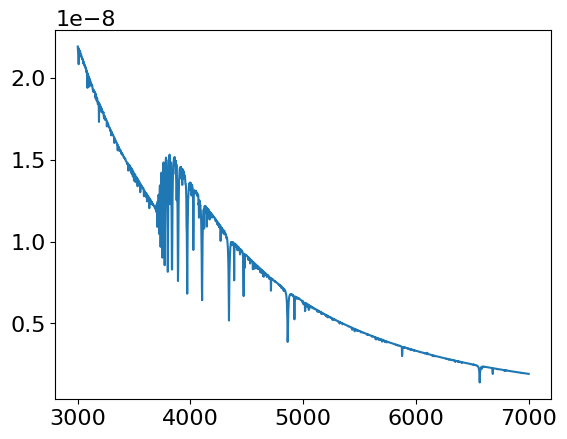

In [5]:
plt.plot(lam_c,spectra)

In [5]:
x = {'Teff':20000 ,'log(g)': 4.1,'[Fe/H]': 0,'Z/Zo':1}
pop.grids.photogrid_flux('secondary_grid',10e-9,**x)

{'U': 1644290389.957219, 'B': 688035373.8568047, 'V': 575954465.0107982}

In [6]:
cmd = population_cmd(file,**pop_kwargs)

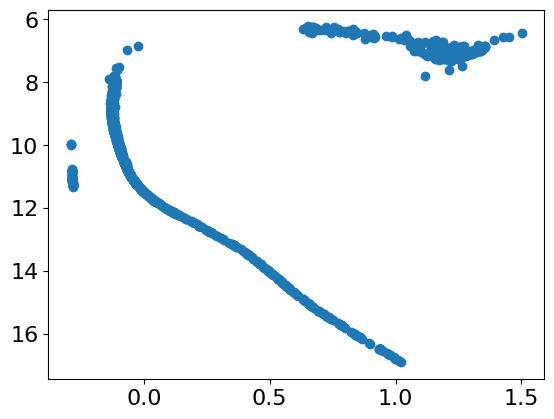

In [7]:
B_V,V,L = cmd.population_mag(3000)
plt.gca().invert_yaxis()
plt.scatter(B_V,V)

In [8]:
spectrum2,lam_c = pop.create_population_spectrum()


Loading the population took 0:00:00.372725 s


KeyError: 'initially_single_star'

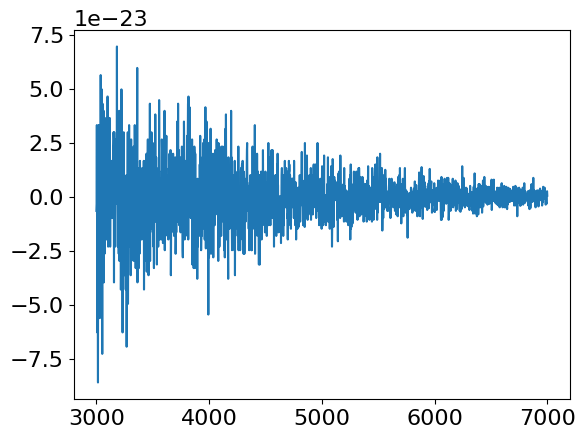

In [24]:
total_spectrum = 0 
for i in spectrum2:
    total_spectrum += spectrum2[i]
#plt.plot(lam_c,total_spectrum)
plt.plot(lam_c,spectra-total_spectrum)

In [21]:
history = pd.read_hdf(file,key = 'history')
end = history[(history.event == 'END') & (history.time == 25110000)]
zams = history[history.event == 'ZAMS']
zams[zams.S1_metallicity != 0.0142]

,state,event,time,orbital_period,eccentricity,S1_state,S1_metallicity,S1_mass,S1_log_R,S1_log_L,...,S2_conv_env_turnover_time_l_b,S2_conv_env_turnover_time_l_t,S2_envelope_binding_energy,S2_mass_conv_reg_fortides,S2_thickness_conv_reg_fortides,S2_radius_conv_reg_fortides,S2_lambda_CE_1cent,S2_lambda_CE_10cent,S2_lambda_CE_30cent,S2_lambda_CE_pure_He_star_10cent
binary_index,,,,,,,,,,,,,,,,,,,,,


In [1]:
from spectral_grids import spectral_grids
spec = spectral_grids()
print(spec.spectral_grids)
spec.wavelength_range_check()

main_grid sg-C3K-coarse.h5
secondary_grid sg-BSTAR2006-medium.h5
stripped_grid sg-Gotberg18.h5
bstar_grid sg-BSTAR2006-medium.h5
ostar_grid sg-OSTAR2002-medium.h5
lam_min 3000.0
lam_max 7000.0
lam_res 2000
cache_limit 256
filters ['U', 'B', 'V']
{'main_grid': <pymsg.SpecGrid object at 0x1503afa65c60>, 'secondary_grid': <pymsg.SpecGrid object at 0x1503afa65ae0>, 'stripped_grid': <pymsg.SpecGrid object at 0x1503afa65870>, 'bstar_grid': <pymsg.SpecGrid object at 0x1503afa65600>, 'ostar_grid': <pymsg.SpecGrid object at 0x1503aa214c40>}
60.9851150264


60.9851150264